In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [252]:
# read data sets

train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)

train['Type'] = 'Train'
test['Type'] = 'Test'
  
sample_submission = pd.read_csv("Sample_Submission.csv")
full_data = pd.concat([train, test], axis = 0)

In [253]:
full_data.columns

Index([u'ApplicantIncome', u'CoapplicantIncome', u'Credit_History',
       u'Dependents', u'Education', u'Gender', u'LoanAmount',
       u'Loan_Amount_Term', u'Loan_Status', u'Married', u'Property_Area',
       u'Self_Employed', u'Type'],
      dtype='object')

In [254]:
full_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Type
Loan_ID,,,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,Y,No,Urban,No,Train
LP001003,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No,Train
LP001005,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes,Train
LP001006,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No,Train
LP001008,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No,Train


In [255]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
Type                 981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [256]:
sample_submission

,Loan_ID,Loan_Status


In [257]:
# get list of target, numerical features and categorical features
target = ["Loan_Status"]
print "target variable:", target
print "\n"

numeric_f = full_data.dtypes[full_data.dtypes != "object"].index
print "numeric features:", list(numeric_f)
print "\n"

factor_f = full_data.dtypes[full_data.dtypes =='object'].index
factor_f = factor_f.drop('Loan_Status')
print "categorical features: ", list(factor_f)

target variable: ['Loan_Status']


numeric features: ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']


categorical features:  ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed', 'Type']


In [258]:
print "number of features: %d" %test.shape[1]
print "number of obs in training set: %d" %train.shape[0]
print "number of obs in test set: %d" %test.shape[0]

number of features: 12
number of obs in training set: 614
number of obs in test set: 367


In [259]:
full_data.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
Credit_History        True
Dependents            True
Education            False
Gender                True
LoanAmount            True
Loan_Amount_Term      True
Loan_Status           True
Married               True
Property_Area        False
Self_Employed         True
Type                 False
dtype: bool

In [260]:
def missing_data_count(df):
    missing_data = {}
    for feature in list(df):
        missing_data.update({feature:len(df[feature]) - df[feature].count()})
    missing_data_df = pd.DataFrame(data = missing_data.values(), columns = ['Missing_Data_Count'],
                                   index = missing_data.keys())
    return missing_data_df

In [261]:
missing_data = missing_data_count(full_data)

In [262]:
missing_data[missing_data["Missing_Data_Count"] >0].sort_values(by = 'Missing_Data_Count', ascending = False)

,Missing_Data_Count
Loan_Status,367
Credit_History,79
Self_Employed,55
LoanAmount,27
Dependents,25
Gender,24
Loan_Amount_Term,20
Married,3


In [263]:
full_data["Married"] = full_data["Married"].fillna("Yes")

In [264]:
# impute missing numerical data with mean
for n in numeric_f:
    full_data[n] = full_data[n].fillna(full_data[n].mean())

In [265]:
# impute missing categorical data with mode
for f in factor_f:
    full_data[f] = full_data[f].fillna(full_data[f].mode().iloc[0])

In [272]:
full_data.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
Credit_History       False
Dependents           False
Education            False
Gender               False
LoanAmount           False
Loan_Amount_Term     False
Loan_Status           True
Married              False
Property_Area        False
Self_Employed        False
Type                 False
dtype: bool

In [268]:
train = full_data[full_data["Type"] == "Train"]
test = full_data[full_data["Type"] == "Test"]

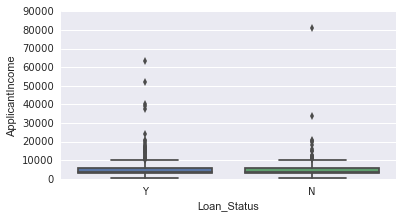

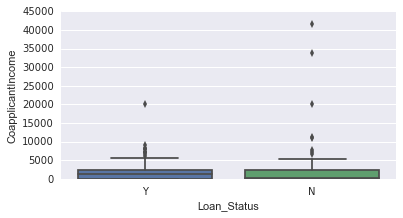

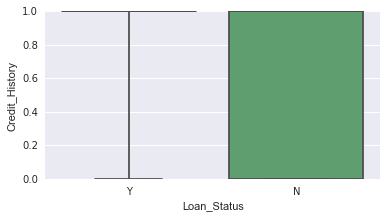

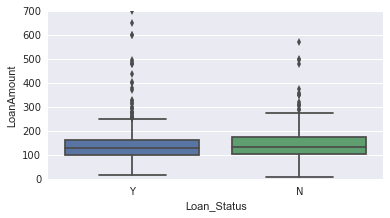

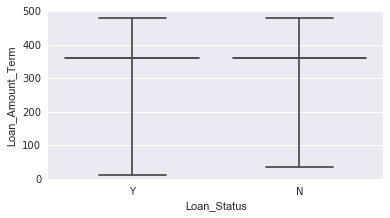

In [281]:
for feature in numeric_f:
    fig, ax = pl.subplots(figsize = (6, 3))
    feature = sns.boxplot( x = "Loan_Status", y = feature, data = train, ax = ax)

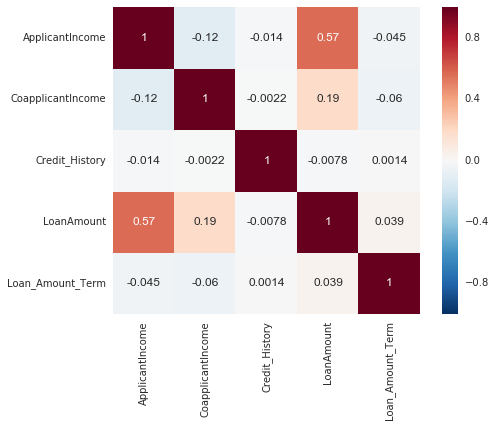

In [291]:
cm = np.corrcoef(train[numeric_f].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                yticklabels = numeric_f, xticklabels = numeric_f)

In [292]:
factor_f

Index([u'Dependents', u'Education', u'Gender', u'Married', u'Property_Area',
       u'Self_Employed', u'Type'],
      dtype='object')

In [298]:
for f in factor_f:
    cross_tab = pd.crosstab(index = train["Loan_Status"], columns = train[f])
    display(cross_tab)

Dependents,0,1,2,3+
Loan_Status,,,,
N,113,36,25,18
Y,247,66,76,33


Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


Gender,Female,Male
Loan_Status,,
N,37,155
Y,75,347


Married,No,Yes
Loan_Status,,
N,79,113
Y,134,288


Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


Self_Employed,No,Yes
Loan_Status,,
N,166,26
Y,366,56


Type,Train
Loan_Status,
N,192
Y,422
